In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from src.data_reading import parse_galaxy_data
from src.data_treatment_tools import add_radian_columns, new_CoM_procedure 
from src.data_display import    (display_hubble_MW, 
                                display_velocities_distance, 
                                display_velocities_distance_color, 
                                animated_velocities_distance,
                                display_mean_squared_velocity,
                                display_velocities_distance_hubble_regression
                                )
from IPython.display import clear_output

In [2]:
galaxy_1_CoM =  "N5128,Cen A"
galaxy_2_CoM =  "N5236, M83"
r=0.76

In [3]:
file_path = 'data/data_clean.txt'
galaxy_df = parse_galaxy_data(file_path)
add_radian_columns(galaxy_df)
new_CoM_procedure(galaxy_df,galaxy1=galaxy_1_CoM,galaxy2=galaxy_2_CoM,m1_barre=r)

CoM_N5128,Cen A_N5236, M83_0.76


c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\src\data_treatment_tools.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '300.19228135818446' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[len(df)] = new_row


In [4]:
def add_pertubative_distances(df:pd.DataFrame,galaxy_center:str)->None:
    """add a new row to the galaxy dataframe containing pertubative distances between all the galaxies and a given galaxy_center 

    Args:
        df (pd.DataFrame): DataFrame containing the data about the galaxy
        galaxy_center (str): Name of the galaxy that will be used as the center of the cluster
    """
    Rc= float(df.loc[df["Name"]==galaxy_center,"Dis"].iloc[0])
    Rg ,theta = df['Dis'],df["angular_distance_"+galaxy_center]
    gamma= (Rg/Rc) - 1
    print(gamma)
    alpha=np.sin(theta/2)
    # Calculer distance
    dis_center = alpha*(2+gamma)*Rc #normalement il y a une valeur absolue sur le sin(theta) mais ici tout les sinus sont positif)
    # Ajouter la colonne au DataFrame
    df['pertubative_dis_center_'+galaxy_center] = dis_center
    
    # add incertainty
    e_Rc = float(df.loc[df["Name"]==galaxy_center,"e_Dis"].iloc[0])
    e_Rg = df['e_Dis']
    
    e_gamma=(e_Rg*Rc+e_Rc*Rg)/(Rc**2)
    
    e_dis_center = alpha*(e_Rc*(2+gamma)+Rc*(e_gamma))
    
    df['e_pertubative_dis_center_'+galaxy_center] = e_dis_center
    df['gamma']=gamma
    df['e_gamma']=e_gamma
    #df[pertubative_dis_center_]= dis_center-

In [5]:
add_pertubative_distances(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

0     0.120051
1    -0.073568
2    -0.666681
3    -0.674033
4    -0.686288
        ...   
82   -0.242679
83    0.421509
84    0.568562
85   -0.401986
86   -0.784323
Name: Dis, Length: 70, dtype: float64


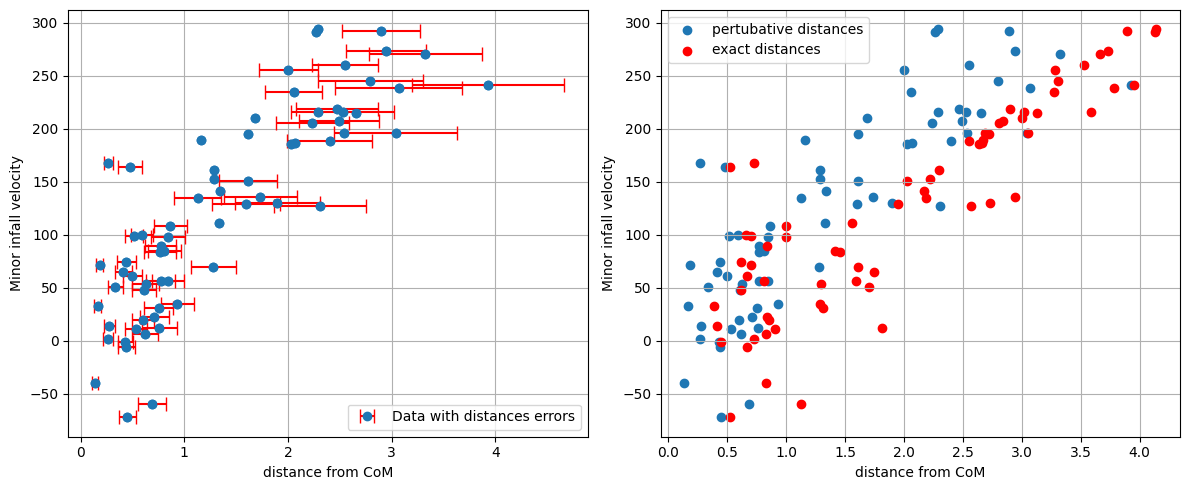

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
x_prime =pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
x_prime =pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x_prime = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Errorbar plot
axs[0].errorbar(x, y, xerr=e_x, fmt='o', capsize=5, ecolor='red', label="Data with distances errors")
axs[0].scatter(x, y)
axs[0].set_xlabel("distance from CoM")
axs[0].set_ylabel("Minor infall velocity")
axs[0].legend()
axs[0].grid(True)

# Second subplot: Scatter plot
axs[1].scatter(x, y, label="pertubative distances")
axs[1].scatter(x_prime,y,color='r', label="exact distances")
axs[1].set_xlabel("distance from CoM")
axs[1].set_ylabel("Minor infall velocity")
plt.legend()

axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

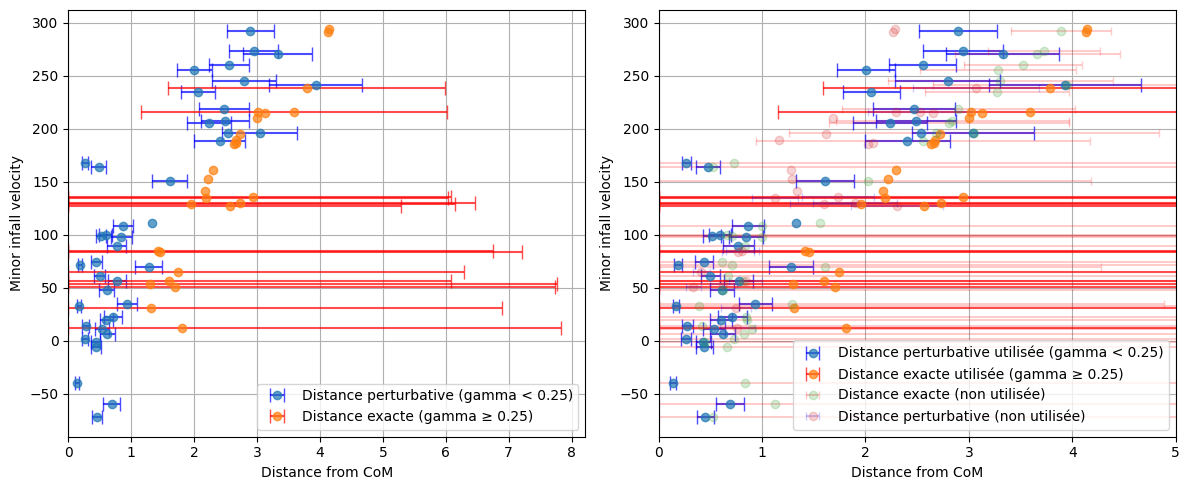

Nombre total de points: 69
Points utilisant la distance perturbative (gamma < 0.25): 42
Points utilisant la distance exacte (gamma ≥ 0.25): 27


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Définir un seuil pour gamma
gamma_threshold = 0.25  # Ajustez cette valeur selon vos besoins

# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
gamma = pd.to_numeric(galaxy_df.loc[mask, "gamma"], errors='coerce').values

# Distances et erreurs perturbatives et exactes
pert_dist = pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
exact_dist = pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_pert_dist = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_exact_dist = pd.to_numeric(galaxy_df.loc[mask, "e_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

# Vitesse d'infall
y = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

# Sélectionner les distances et erreurs en fonction de gamma
use_pert = gamma < gamma_threshold
use_exact = ~use_pert

# Créer les tableaux finaux pour le tracé
x = np.zeros_like(gamma, dtype=float)
e_x = np.zeros_like(gamma, dtype=float)

# Assignation des valeurs selon la condition gamma
x[use_pert] = pert_dist[use_pert]
x[use_exact] = exact_dist[use_exact]
e_x[use_pert] = e_pert_dist[use_pert]
e_x[use_exact] = e_exact_dist[use_exact]

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Errorbar plot avec différenciation par couleur
# Préparer les barres d'erreur pour qu'elles ne dépassent pas en territoire négatif
e_x_lower = np.minimum(e_x, x)  # Assurez-vous que l'erreur ne dépasse pas la valeur de x
e_x_upper = e_x  # Erreur normale vers la droite

# Points avec distance perturbative
axs[0].errorbar(x[use_pert], y[use_pert], xerr=[e_x_lower[use_pert], e_x_upper[use_pert]], 
                fmt='o', capsize=5, ecolor='blue', alpha=0.7,
                label=f"Distance perturbative (gamma < {gamma_threshold})")

# Points avec distance exacte
axs[0].errorbar(x[use_exact], y[use_exact], xerr=[e_x_lower[use_exact], e_x_upper[use_exact]], 
                fmt='o', capsize=5, ecolor='red', alpha=0.7,
                label=f"Distance exacte (gamma ≥ {gamma_threshold})")

axs[0].set_xlabel("Distance from CoM")
axs[0].set_ylabel("Minor infall velocity")
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(left=0)  # Évite les valeurs négatives

# Second subplot: Scatter plot avec erreurs pour les deux types de distances
# Préparer les barres d'erreur pour les distances perturbatives et exactes
e_pert_lower = np.minimum(e_pert_dist, pert_dist)
e_pert_upper = e_pert_dist
e_exact_lower = np.minimum(e_exact_dist, exact_dist)
e_exact_upper = e_exact_dist

# Distances perturbatives utilisées (avec erreurs)
axs[1].errorbar(pert_dist[use_pert], y[use_pert], 
                xerr=[e_pert_lower[use_pert], e_pert_upper[use_pert]],
                fmt='o', capsize=5, ecolor='blue', alpha=0.7,
                label=f"Distance perturbative utilisée (gamma < {gamma_threshold})")

# Distances exactes utilisées (avec erreurs)
axs[1].errorbar(exact_dist[use_exact], y[use_exact], 
                xerr=[e_exact_lower[use_exact], e_exact_upper[use_exact]],
                fmt='o', capsize=5, ecolor='red', alpha=0.7,
                label=f"Distance exacte utilisée (gamma ≥ {gamma_threshold})")

# Ajouter les points non utilisés en transparence, également avec erreurs
axs[1].errorbar(exact_dist[use_pert], y[use_pert], 
                xerr=[e_exact_lower[use_pert], e_exact_upper[use_pert]],
                fmt='o', capsize=3, ecolor='red', alpha=0.2,
                label="Distance exacte (non utilisée)")

axs[1].errorbar(pert_dist[use_exact], y[use_exact], 
                xerr=[e_pert_lower[use_exact], e_pert_upper[use_exact]],
                fmt='o', capsize=3, ecolor='blue', alpha=0.2,
                label="Distance perturbative (non utilisée)")

axs[1].set_xlabel("Distance from CoM")
axs[1].set_ylabel("Minor infall velocity")
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim(left=0)  # Évite les valeurs négatives
axs[1].set_xlim(right=5)
# Display the plots
plt.tight_layout()
plt.show()

# Afficher quelques statistiques pour vérification
print(f"Nombre total de points: {len(gamma)}")
print(f"Points utilisant la distance perturbative (gamma < {gamma_threshold}): {np.sum(use_pert)}")
print(f"Points utilisant la distance exacte (gamma ≥ {gamma_threshold}): {np.sum(use_exact)}")

In [8]:
def add_pertubative_minor_infall_velocity(df: pd.DataFrame, galaxy_center: str) -> None:
    """Add a new column containing the new velocity regarding the galaxy center using the minor infall model.

    Args:
        df (pd.DataFrame): DataFrame containing the information about galaxy
        galaxy_center (str): Name of the galaxy center
    """
    distance_center = float(df.loc[df["Name"] == galaxy_center, "Dis"].iloc[0])
    velocity_center = float(df.loc[df["Name"] == galaxy_center, "VLG"].iloc[0])
    
    e_distance_center = float(df.loc[df["Name"] == galaxy_center, "e_Dis"].iloc[0])
    e_velocity_center = float(df.loc[df["Name"] == galaxy_center, "e_VLG"].iloc[0])
    
    # Function to calculate minor velocities
    def calculate_minor_infall(row):
        rg = row['Dis']
        vg = row['VLG']
        cos_theta = row['cos_theta_' + galaxy_center]
        theta = row['angular_distance_' + galaxy_center]
        rgcenter = row['pertubative_dis_center_' + galaxy_center]
        
        e_rg = row['e_Dis']
        e_vg = row['e_VLG']
        e_rgcenter = row['e_pertubative_dis_center_' + galaxy_center]
        
        gamma= row['gamma']
        e_gamma= row['e_gamma']
        
        #if rgcenter == 0:
        #    return pd.Series([0, 0])
        #
        #numerator = (velocity_center * distance_center + vg * rg) - cos_theta * (vg * distance_center + velocity_center * rg)
        #
        #e_r1 = (rg * e_rgcenter + e_rg * rgcenter) / (rgcenter ** 2)
        #e_r2 = (distance_center * e_rgcenter + e_distance_center * rgcenter) / (rgcenter ** 2)
        #error_velocity = (
        #    e_vg * (rg + cos_theta * distance_center) +
        #    e_velocity_center * (distance_center + cos_theta * rg)
        #) / rgcenter + e_r1 * (vg + velocity_center * cos_theta) + e_r2 * (velocity_center + vg * cos_theta)
        #
        #return pd.Series([numerator / rgcenter, error_velocity])
        beta= 1/(2*np.absolute(np.sin(theta/2)))
        v_rad=beta*(1-cos_theta)*(vg+velocity_center)-0.5*gamma*(1+cos_theta)*(vg-velocity_center)
        e_v_rad= beta*((np.absolute(1-cos_theta)+np.absolute(0.5*gamma*(1+cos_theta)))*(e_vg + e_velocity_center) +
                       0.5*e_gamma*np.absolute((1+cos_theta)*(vg-velocity_center)))
        return pd.Series([v_rad,e_v_rad])
    
    result = df.apply(calculate_minor_infall, axis=1)
    df['pertubative_minor_infall_velocity_' + galaxy_center] = result[0]
    df['e_pertubative_minor_infall_velocity_' + galaxy_center] = result[1]
    
    

In [9]:
add_pertubative_minor_infall_velocity(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

C:\Users\Adrian\AppData\Local\Temp\ipykernel_2324\2357722181.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  beta= 1/(2*np.absolute(np.sin(theta/2)))
C:\Users\Adrian\AppData\Local\Temp\ipykernel_2324\2357722181.py:43: RuntimeWarning: invalid value encountered in scalar multiply
  v_rad=beta*(1-cos_theta)*(vg+velocity_center)-0.5*gamma*(1+cos_theta)*(vg-velocity_center)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_2324\2357722181.py:44: RuntimeWarning: invalid value encountered in scalar multiply
  e_v_rad= beta*((np.absolute(1-cos_theta)+np.absolute(0.5*gamma*(1+cos_theta)))*(e_vg + e_velocity_center) +


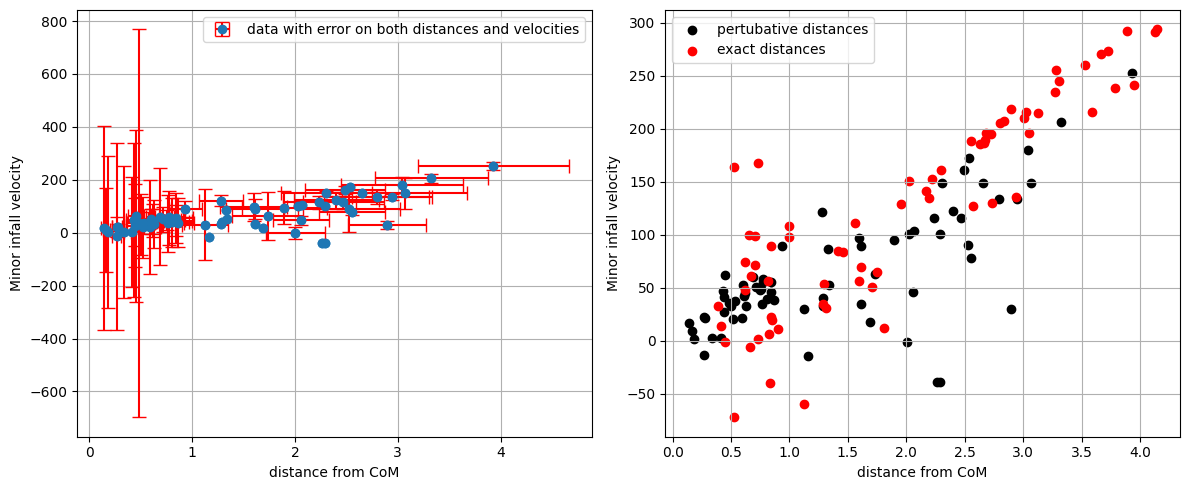

In [10]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
x_prime =pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y = pd.to_numeric(galaxy_df.loc[mask, "pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y_prime = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_y = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Errorbar plot
axs[0].errorbar(x, y, xerr=e_x,yerr=e_y, fmt='o', capsize=5, ecolor='red', label="data with error on both distances and velocities")
axs[0].scatter(x, y)
axs[0].set_xlabel("distance from CoM")
axs[0].set_ylabel("Minor infall velocity")
axs[0].legend()
axs[0].grid(True)

# Second subplot: Scatter plot
axs[1].scatter(x, y, color='black', label="pertubative distances")
axs[1].scatter(x_prime, y_prime, color='r', label="exact distances")
axs[1].set_xlabel("distance from CoM")
axs[1].set_ylabel("Minor infall velocity")
plt.legend()

axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

16.666666666666654
16.666666666666654


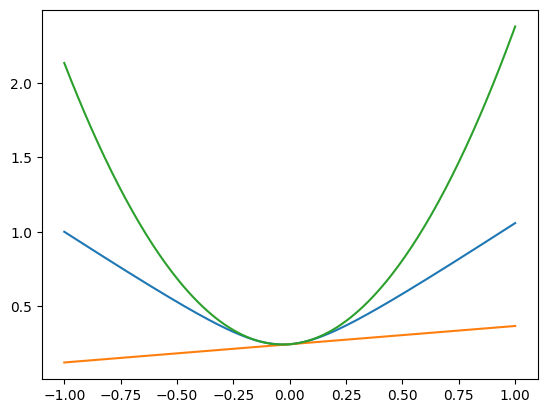

In [11]:
def f(gamma):
    cos_theta= 0.97 # cos(13°)
    r1=1
    r2=1+gamma
    return np.sqrt(r1**2+r2**2-2*cos_theta*r1*r2)

def pertubative_f(gamma):
    cos_theta= 0.97 # cos(13°)
    alpha=2-2*cos_theta
    print(1/alpha)
    return np.sqrt(alpha)*(1+0.5*gamma) 

def pertubative2_f(gamma):
    cos_theta= 0.97 # cos(13°)
    alpha=2-2*cos_theta
    print(1/alpha)
    return np.sqrt(alpha)*(1+0.5*(gamma+(gamma**2)/alpha)-0.125*gamma**2)  # *(1+0.5*gamma)

def pertubative3_f(gamma):
    cos_theta= 0.97 # cos(13°)
    alpha=2-2*cos_theta
    print(1/alpha)
    return np.sqrt(alpha)*(1+0.5*(gamma+(gamma**2)/alpha)-0.125*(gamma+(gamma**2)/alpha)**2)  # *(1+0.5*gamma)

gammas=np.arange(-1,1.01,0.01)

plt.plot(gammas,f(gammas))
plt.plot(gammas,pertubative_f(gammas))
plt.plot(gammas,pertubative2_f(gammas))
plt.show()


In [12]:
def g(r1,r2):
    cos_theta= 0.97 # cos(13°)
    return np.sqrt(r1**2+r2**2-2*cos_theta*r1*r2)

À r1=10, r2=8:
Valeur de g: 2.9665
Erreur estimée: 0.4417
Erreur relative: 14.89%

Statistiques sur la plage complète:
g varie de 2.4491 à 3.6329
Variation totale de g: 1.1838
Erreur varie de 0.3064 à 0.5161
Erreur relative maximale possible: 21.07%


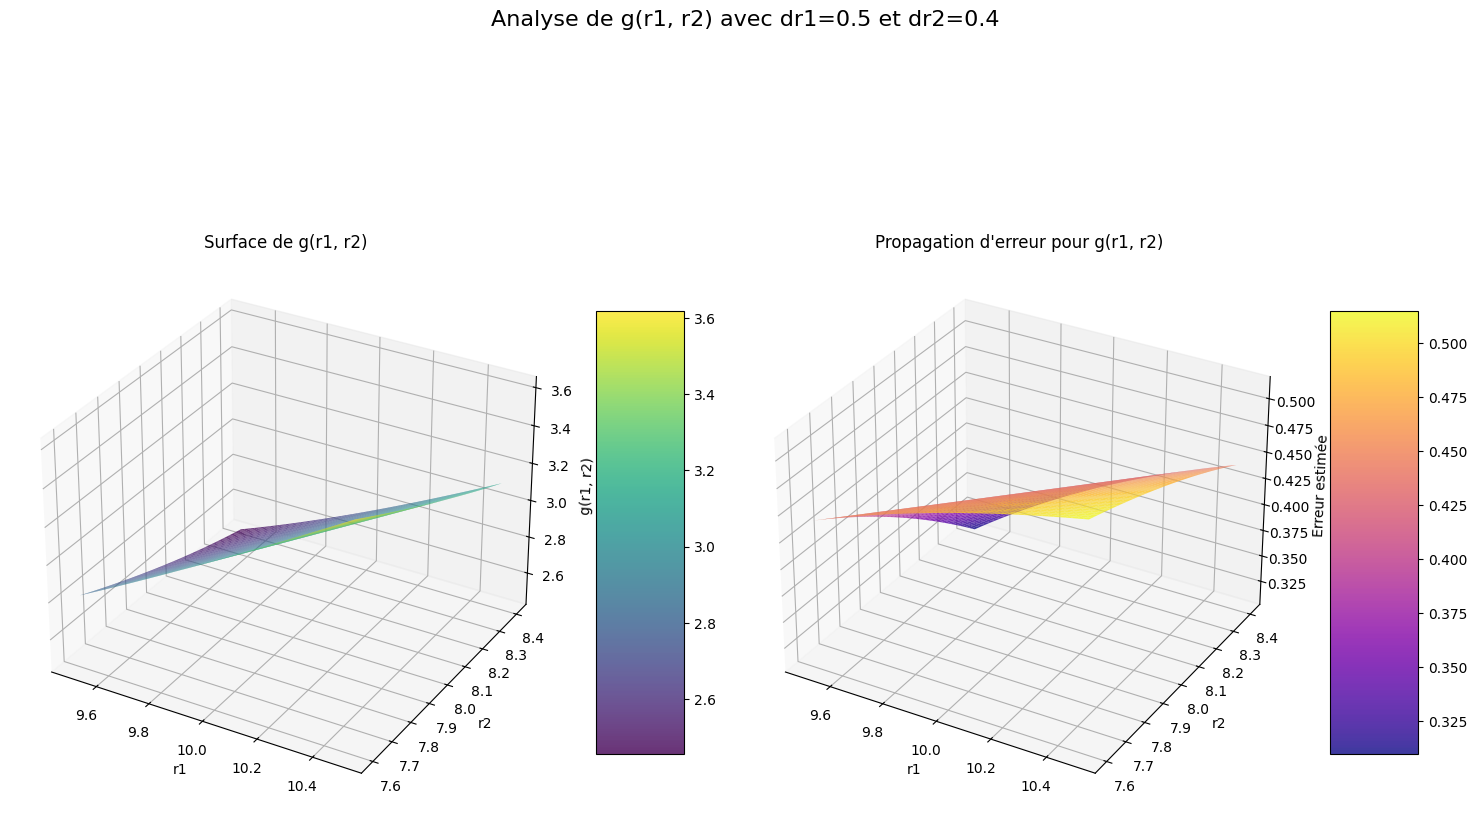

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Fonction g
def g(r1, r2):
    cos_theta = 0.97  # cos(13°)
    return np.sqrt(r1**2 + r2**2 - 2 * cos_theta * r1 * r2)

# Estimation de l'erreur par différentiation
def error_estimation(r1, r2, dr1, dr2):
    # Dérivées partielles
    cos_theta= 0.97 
    dg_dr1 = (r1 - r2 * cos_theta) / g(r1, r2)
    dg_dr2 = (r2 - r1 * cos_theta) / g(r1, r2)
    
    # Propagation d'erreur (somme en quadrature)
    error = np.sqrt((dg_dr1 * dr1)**2 + (dg_dr2 * dr2)**2)
    return error

# Valeurs pour la visualisation
r1_center = 10  # Valeur centrale de r1
r2_center = 8   # Valeur centrale de r2
dr1 = 0.5       # Variation de r1
dr2 = 0.4       # Variation de r2

# Création des grilles pour la visualisation
points = 50
r1_range = np.linspace(r1_center - dr1, r1_center + dr1, points)
r2_range = np.linspace(r2_center - dr2, r2_center + dr2, points)
R1, R2 = np.meshgrid(r1_range, r2_range)

# Calcul des valeurs de g pour chaque paire (r1, r2)
G_values = g(R1, R2)

# Calcul des erreurs pour chaque paire (r1, r2)
error_values = error_estimation(R1, R2, dr1, dr2)

# Création de la figure pour les visualisations
fig = plt.figure(figsize=(15, 10))

# Première sous-figure: Surface de g(r1, r2)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(R1, R2, G_values, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('r1')
ax1.set_ylabel('r2')
ax1.set_zlabel('g(r1, r2)')
ax1.set_title('Surface de g(r1, r2)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Deuxième sous-figure: Surface d'erreur
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(R1, R2, error_values, cmap=cm.plasma, alpha=0.8)
ax2.set_xlabel('r1')
ax2.set_ylabel('r2')
ax2.set_zlabel('Erreur estimée')
ax2.set_title('Propagation d\'erreur pour g(r1, r2)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# Configuration globale
plt.suptitle(f'Analyse de g(r1, r2) avec dr1={dr1} et dr2={dr2}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Pour calculer l'erreur relative à un point spécifique
g_center = g(r1_center, r2_center)
error_center = error_estimation(r1_center, r2_center, dr1, dr2)
relative_error = (error_center / g_center) * 100

print(f"À r1={r1_center}, r2={r2_center}:")
print(f"Valeur de g: {g_center:.4f}")
print(f"Erreur estimée: {error_center:.4f}")
print(f"Erreur relative: {relative_error:.2f}%")

# Si on veut des statistiques plus détaillées sur toute la plage
g_min = G_values.min()
g_max = G_values.max()
error_min = error_values.min()
error_max = error_values.max()
relative_error_max = (error_max / g_min) * 100

print("\nStatistiques sur la plage complète:")
print(f"g varie de {g_min:.4f} à {g_max:.4f}")
print(f"Variation totale de g: {g_max - g_min:.4f}")
print(f"Erreur varie de {error_min:.4f} à {error_max:.4f}")
print(f"Erreur relative maximale possible: {relative_error_max:.2f}%")

plt.show()

In [14]:
import numpy as np

def add_g_extremal_values_to_df(df, galaxy_center, n_points=100):
    """
    Calcule les valeurs extrémales de g(r1,r2) pour chaque ligne du dataframe
    et ajoute les résultats comme nouvelles colonnes.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe contenant les données
    galaxy_center : str
        Nom du centre galactique pour récupérer r2 et dr2
    n_points : int, optional
        Nombre de points à utiliser pour le maillage (default: 100)
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe avec les colonnes ajoutées
    """
    # Récupérer les valeurs de r2 et dr2 (valeurs fixes) depuis le dataframe
    r2 = float(df.loc[df["Name"] == galaxy_center, "Dis"].iloc[0])
    dr2 = float(df.loc[df["Name"] == galaxy_center, "e_Dis"].iloc[0])
    
    # Créer les colonnes de sortie si elles n'existent pas déjà
    for col in ["g_min_grid", "g_max_grid", "error_grid", "error_analytical"]:
        if col not in df.columns:
            df[col] = np.nan
    
    # Traiter chaque ligne du dataframe
    for idx, row in df.iterrows():
        # Récupérer les valeurs pour cette ligne
        r1 = row["Dis"]
        dr1 = row["e_Dis"]
        cos_theta = row["cos_theta_"+galaxy_center]
        
        # Vérifier si on a des valeurs valides
        if np.isnan(r1) or np.isnan(dr1) or np.isnan(cos_theta):
            continue
        
        # Définir la fonction g pour ce cos_theta spécifique
        def g(r1_val, r2_val):
            return np.sqrt(r1_val**2 + r2_val**2 - 2 * cos_theta * r1_val * r2_val)
        
        # Méthode 1: Calcul par maillage complet
        r1_range = np.linspace(r1 - dr1, r1 + dr1, n_points)
        r2_range = np.linspace(r2 - dr2, r2 + dr2, n_points)
        R1, R2 = np.meshgrid(r1_range, r2_range)
        
        # Calcul des valeurs de g pour chaque paire (r1, r2)
        G_values = g(R1, R2)
        
        # Trouver les valeurs extrémales
        g_min_grid = G_values.min()
        g_max_grid = G_values.max()
        
        # Calcul de g au point central
        g_center = g(r1, r2)
        
        # Méthode 2: Calcul analytique par propagation d'erreurs
        try:
            dg_dr1 = (r1 - r2 * cos_theta) / g(r1, r2)
            dg_dr2 = (r2 - r1 * cos_theta) / g(r1, r2)
            
            # Propagation d'erreur (somme en quadrature)
            error_analytical_squarred = np.sqrt((dg_dr1 * dr1)**2 + (dg_dr2 * dr2)**2) 
            error_analytical = (np.absolute(dg_dr1) * dr1) + (np.absolute(dg_dr2) * dr2) 
        except:
            error_analytical = np.nan
        
        # Ajouter les résultats au dataframe
        
        # Ajouter les résultats au dataframe
        df.at[idx, "g_min_offset"] = g_center - g_min_grid
        df.at[idx, "g_max_offset"] = g_max_grid - g_center
        df.at[idx, "g_min_grid"] = g_min_grid
        df.at[idx, "g_max_grid"] = g_max_grid  
        df.at[idx, "error_grid"] = (g_max_grid - g_min_grid) / 2  # Demi-amplitude de variation
        df.at[idx, "error_analytical"] = error_analytical
        df.at[idx, "error_analytical_squarred"] = error_analytical_squarred 




In [15]:
add_g_extremal_values_to_df(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

C:\Users\Adrian\AppData\Local\Temp\ipykernel_2324\450526436.py:63: RuntimeWarning: invalid value encountered in scalar divide
  dg_dr1 = (r1 - r2 * cos_theta) / g(r1, r2)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_2324\450526436.py:64: RuntimeWarning: invalid value encountered in scalar divide
  dg_dr2 = (r2 - r1 * cos_theta) / g(r1, r2)


In [16]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# galaxy_df.head(100)

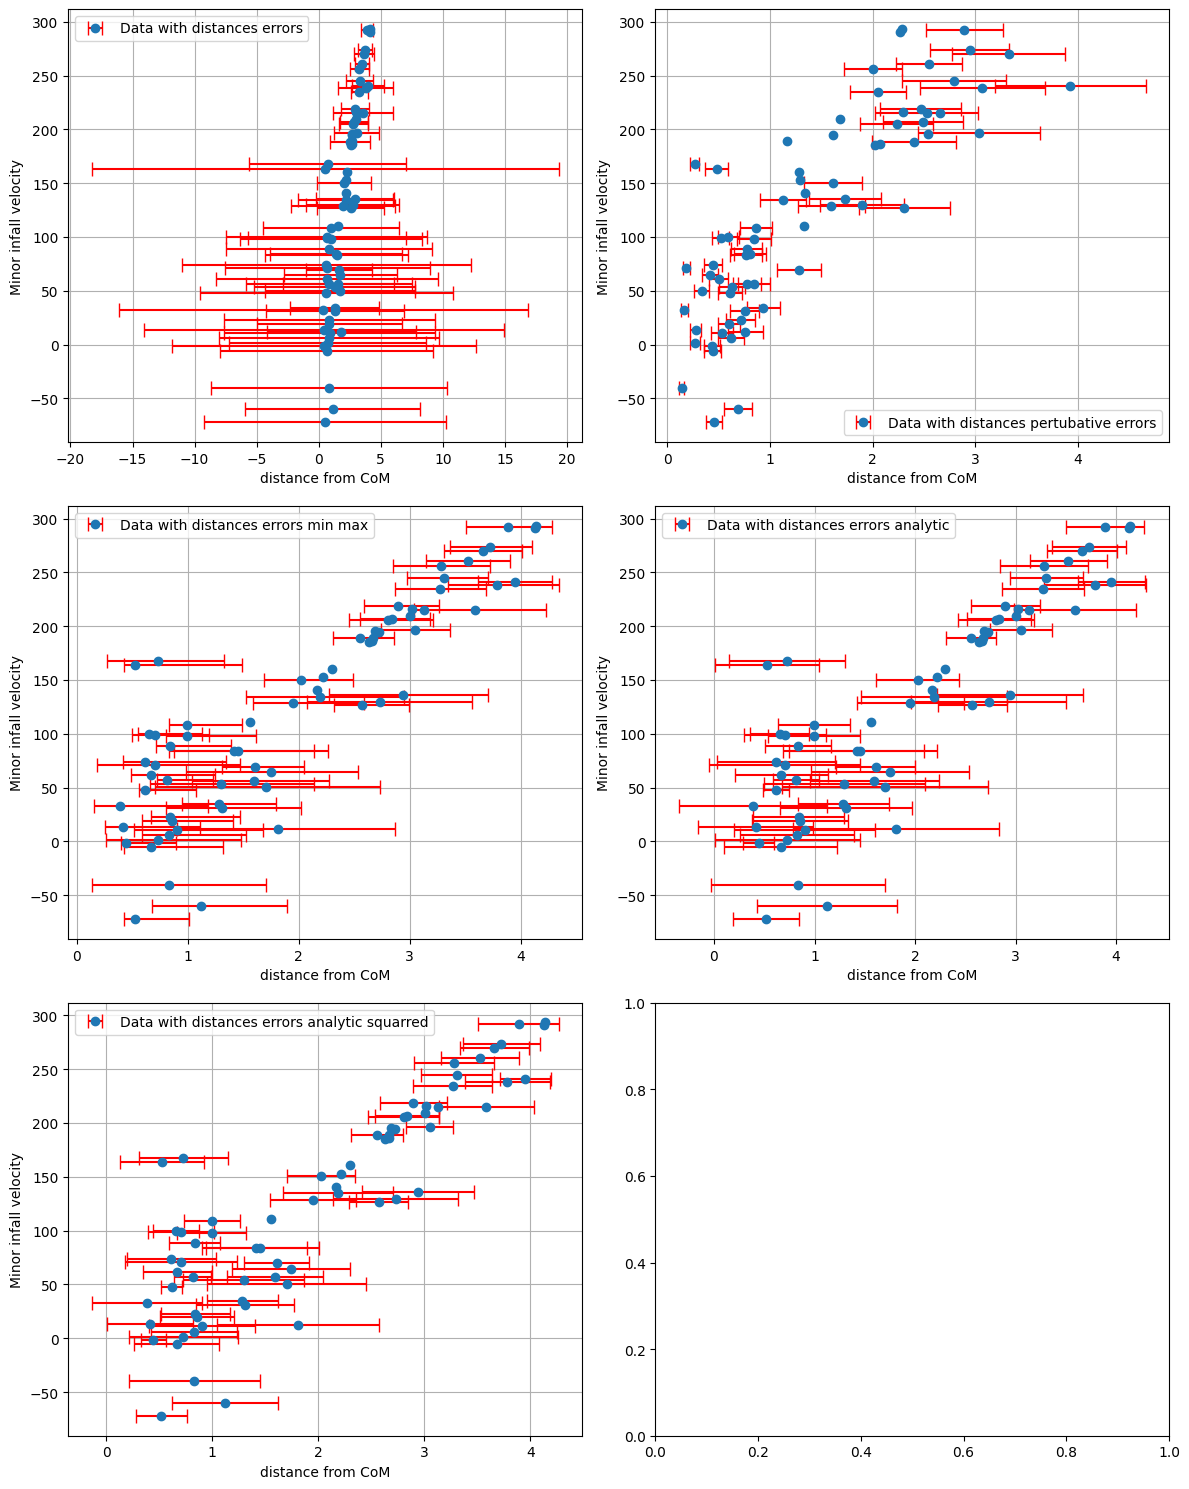

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x=pd.to_numeric(galaxy_df.loc[mask, "e_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x_min = pd.to_numeric(galaxy_df.loc[mask, "g_min_offset"], errors='coerce').values
e_x_max=pd.to_numeric(galaxy_df.loc[mask, "g_max_offset"], errors='coerce').values
e_x_analytic=pd.to_numeric(galaxy_df.loc[mask, "error_analytical"], errors='coerce').values
e_x_analytic_squarred=pd.to_numeric(galaxy_df.loc[mask, "error_analytical_squarred"], errors='coerce').values

x_pertubative=pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x_pertubative=pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

y = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# First subplot: Errorbar plot
axs[0][0].errorbar(x, y, xerr=e_x, fmt='o', capsize=5, ecolor='red', label="Data with distances errors")
axs[0][0].set_xlabel("distance from CoM")
axs[0][0].set_ylabel("Minor infall velocity")
axs[0][0].legend()
axs[0][0].grid(True)

axs[0][1].errorbar(x_pertubative, y, xerr=e_x_pertubative, fmt='o', capsize=5, ecolor='red', label="Data with distances pertubative errors")
axs[0][1].set_xlabel("distance from CoM")
axs[0][1].set_ylabel("Minor infall velocity")
axs[0][1].legend()
axs[0][1].grid(True)


# Second subplot: Scatter plot
axs[1][0].errorbar(x, y, xerr=[e_x_min,e_x_max], fmt='o', capsize=5, ecolor='red', label="Data with distances errors min max")
axs[1][0].set_xlabel("distance from CoM")
axs[1][0].set_ylabel("Minor infall velocity")
axs[1][0].legend()
axs[1][0].grid(True)


axs[1][1].errorbar(x, y, xerr=e_x_analytic, fmt='o', capsize=5, ecolor='red', label="Data with distances errors analytic")
axs[1][1].set_xlabel("distance from CoM")
axs[1][1].set_ylabel("Minor infall velocity")
axs[1][1].legend()
axs[1][1].grid(True)

axs[2][0].errorbar(x, y, xerr=e_x_analytic_squarred, fmt='o', capsize=5, ecolor='red', label="Data with distances errors analytic squarred")
axs[2][0].set_xlabel("distance from CoM")
axs[2][0].set_ylabel("Minor infall velocity")
axs[2][0].legend()
axs[2][0].grid(True)
# Display the plots
plt.tight_layout()
plt.show()

In [18]:
def add_velocity_extremal_values_to_df(df, galaxy_center, n_points=100):
    """
    Calcule les valeurs extrémales de la vitesse d'infall mineure pour chaque galaxie
    et ajoute les résultats comme nouvelles colonnes.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe contenant les données des galaxies
    galaxy_center : str
        Nom du centre galactique de référence
    n_points : int, optional
        Nombre de points à utiliser pour le maillage (default: 100)
    """
    # Récupérer les valeurs pour la galaxie centrale
    r2 = float(df.loc[df["Name"] == galaxy_center, "Dis"].iloc[0])
    dr2 = float(df.loc[df["Name"] == galaxy_center, "e_Dis"].iloc[0])
    v2 = float(df.loc[df["Name"] == galaxy_center, "VLG"].iloc[0])
    dv2 = float(df.loc[df["Name"] == galaxy_center, "e_VLG"].iloc[0]) if "e_VLG" in df.columns else 0
    
    # Créer les colonnes de sortie si elles n'existent pas déjà
    for col in ["v_min_grid", "v_max_grid", "v_error_grid", "v_error_analytical"]:
        if col not in df.columns:
            df[col] = np.nan
    
    # Traiter chaque ligne du dataframe
    for idx, row in df.iterrows():
        # Récupérer les valeurs pour cette galaxie
        r1 = row["Dis"]
        dr1 = row["e_Dis"]
        v1 = row["VLG"]
        dv1 = row["e_VLG"] if "e_VLG" in df.columns else 0
        cos_theta = row["cos_theta_" + galaxy_center]
        rgcenter = row["dis_center_" + galaxy_center]
        e_rgcenter = row["e_dis_center_" + galaxy_center]
        
        # Vérifier si on a des valeurs valides et si ce n'est pas la galaxie centrale
        if np.isnan(r1) or np.isnan(dr1) or np.isnan(cos_theta) or row["Name"] == galaxy_center:
            continue
        
        # Définir la fonction de calcul de vitesse d'infall mineure
        def velocity_func(r1_val, dr1_val, v1_val, dv1_val, r2_val, dr2_val, v2_val, dv2_val, cos_theta_val):
            # Calculer d'abord la distance entre les galaxies
            rgcenter_val = np.sqrt(r1_val**2 + r2_val**2 - 2 * cos_theta_val * r1_val * r2_val)
            
            # Éviter la division par zéro
            if rgcenter_val == 0:
                return 0
                
            # Calculer la vitesse d'infall mineure
            numerator = (v2_val * r2_val + v1_val * r1_val) - cos_theta_val * (v1_val * r2_val + v2_val * r1_val)
            return numerator / rgcenter_val
        
        # Méthode 1: Calcul par maillage complet
        # Créer des plages de valeurs tenant compte des incertitudes
        r1_range = np.linspace(r1 - dr1, r1 + dr1, n_points)
        r2_range = np.linspace(r2 - dr2, r2 + dr2, n_points)
        v1_range = np.linspace(v1 - dv1, v1 + dv1, n_points)
        v2_range = np.linspace(v2 - dv2, v2 + dv2, n_points)
        
        # Initialiser les valeurs min et max
        v_values = []
        
        # Pour limiter la complexité, on peut échantillonner un sous-ensemble de points
        sample_size = min(20, n_points)  # Prendre au maximum 20 points dans chaque dimension
        r1_sample = np.linspace(r1 - dr1, r1 + dr1, sample_size)
        r2_sample = np.linspace(r2 - dr2, r2 + dr2, sample_size)
        v1_sample = np.linspace(v1 - dv1, v1 + dv1, sample_size)
        v2_sample = np.linspace(v2 - dv2, v2 + dv2, sample_size)
        
        # Calculer les valeurs pour chaque combinaison d'échantillons
        for r1_val in r1_sample:
            for r2_val in r2_sample:
                for v1_val in v1_sample:
                    for v2_val in v2_sample:
                        v_val = velocity_func(r1_val, dr1, v1_val, dv1, r2_val, dr2, v2_val, dv2, cos_theta)
                        if not np.isnan(v_val) and not np.isinf(v_val):
                            v_values.append(v_val)
        
        # Trouver les valeurs extrémales
        if v_values:
            v_min_grid = min(v_values)
            v_max_grid = max(v_values)
            
            # Valeur centrale
            v_center = velocity_func(r1, dr1, v1, dv1, r2, dr2, v2, dv2, cos_theta)
            
            # Méthode 2: Calcul analytique par propagation d'erreurs
            try:
                # Dérivées partielles pour la propagation d'erreurs
                # Calculer numériquement les dérivées partielles
                delta = 1e-6  # Petit delta pour l'approximation numérique
                
                # Pour r1
                dv_dr1 = (velocity_func(r1 + delta, dr1, v1, dv1, r2, dr2, v2, dv2, cos_theta) - 
                          velocity_func(r1 - delta, dr1, v1, dv1, r2, dr2, v2, dv2, cos_theta)) / (2 * delta)
                
                # Pour r2
                dv_dr2 = (velocity_func(r1, dr1, v1, dv1, r2 + delta, dr2, v2, dv2, cos_theta) - 
                          velocity_func(r1, dr1, v1, dv1, r2 - delta, dr2, v2, dv2, cos_theta)) / (2 * delta)
                
                # Pour v1
                dv_dv1 = (velocity_func(r1, dr1, v1 + delta, dv1, r2, dr2, v2, dv2, cos_theta) - 
                          velocity_func(r1, dr1, v1 - delta, dv1, r2, dr2, v2, dv2, cos_theta)) / (2 * delta)
                
                # Pour v2
                dv_dv2 = (velocity_func(r1, dr1, v1, dv1, r2, dr2, v2 + delta, dv2, cos_theta) - 
                          velocity_func(r1, dr1, v1, dv1, r2, dr2, v2 - delta, dv2, cos_theta)) / (2 * delta)
                
                # Propagation d'erreur (somme en quadrature)
                v_error_analytical_squarred = np.sqrt((dv_dr1 * dr1)**2 + (dv_dr2 * dr2)**2 + 
                                           (dv_dv1 * dv1)**2 + (dv_dv2 * dv2)**2)
                v_error_analytical = (np.absolute(dv_dr1) * dr1) + (np.absolute(dv_dr2) * dr2) + (np.absolute(dv_dv1) * dv1) + (np.absolute(dv_dv2) * dv2)
            except:
                v_error_analytical = np.nan
            
            # Ajouter les résultats au dataframe
            df.at[idx, "v_min_grid"] = v_min_grid
            df.at[idx, "v_max_grid"] = v_max_grid
            df.at[idx, "v_min_offset"] = v_center - v_min_grid
            df.at[idx, "v_max_offset"] = v_max_grid - v_center
            df.at[idx, "v_error_grid"] = (v_max_grid - v_min_grid) / 2  # Demi-amplitude de variation
            df.at[idx, "v_error_analytical"] = v_error_analytical
            df.at[idx, "v_error_analytical_squarred"] = v_error_analytical_squarred
        

In [19]:
add_velocity_extremal_values_to_df(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

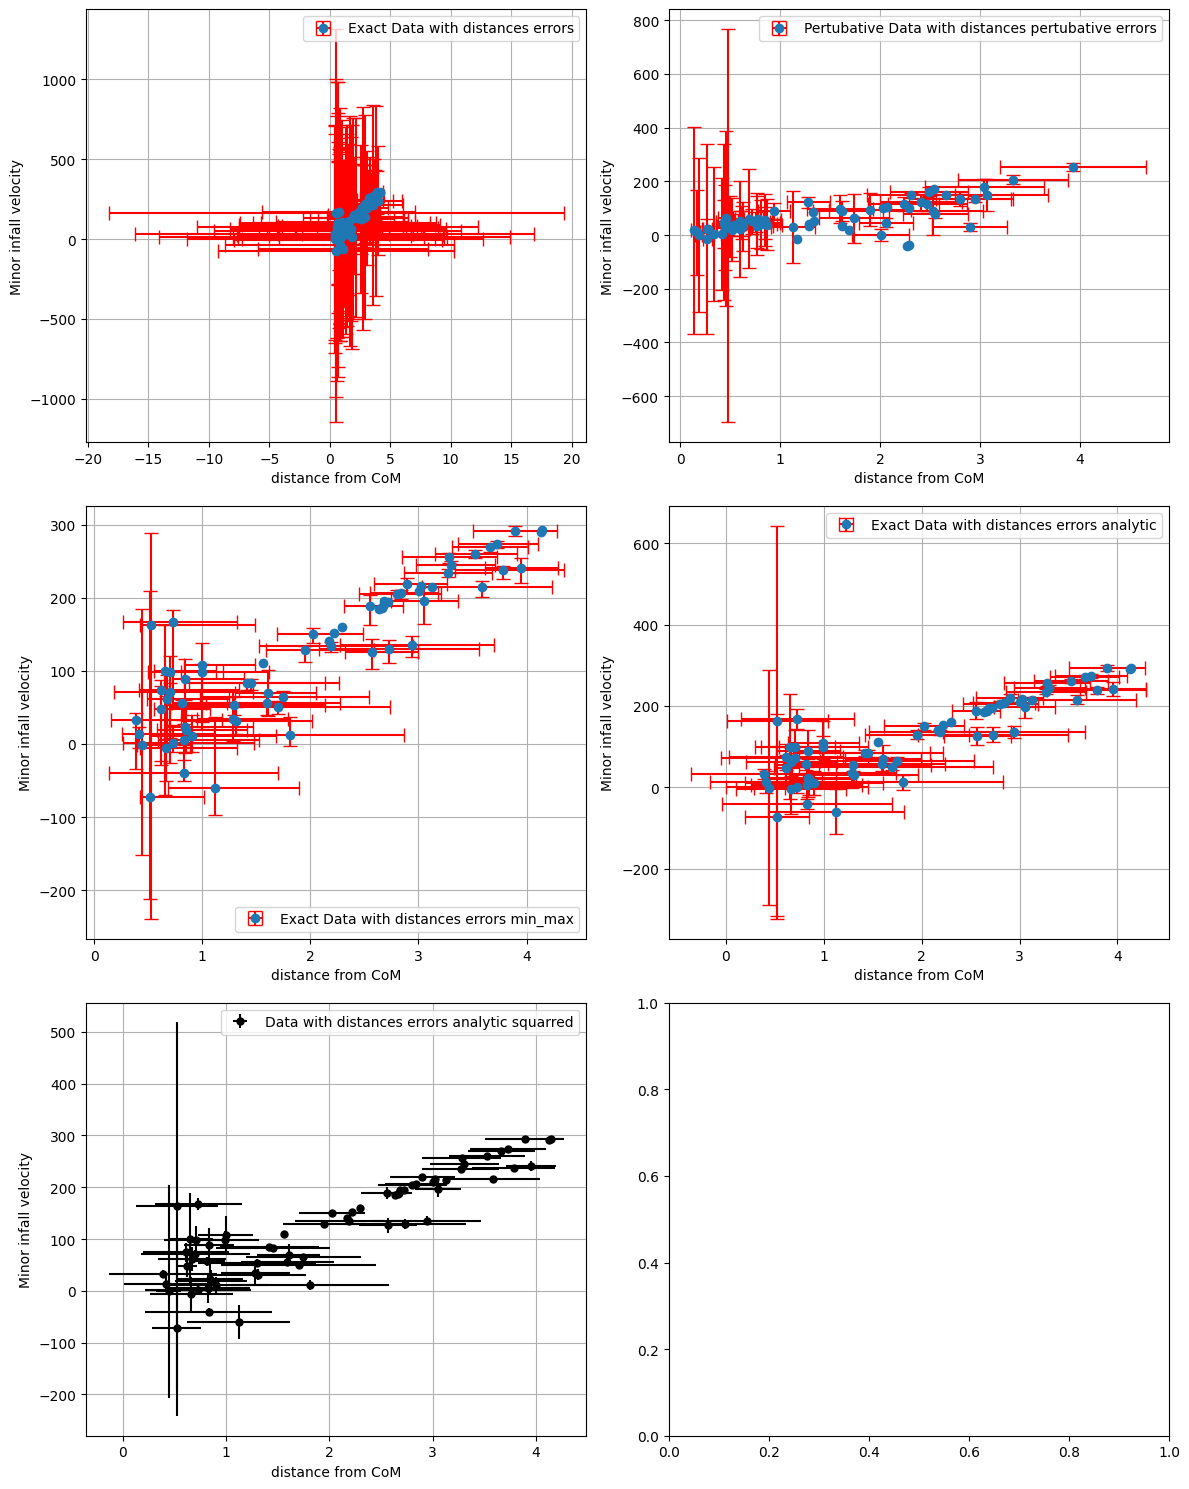

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x=pd.to_numeric(galaxy_df.loc[mask, "e_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x_min = pd.to_numeric(galaxy_df.loc[mask, "g_min_offset"], errors='coerce').values
e_x_max=pd.to_numeric(galaxy_df.loc[mask, "g_max_offset"], errors='coerce').values
e_x_analytic=pd.to_numeric(galaxy_df.loc[mask, "error_analytical"], errors='coerce').values
e_x_analytic_squarred=pd.to_numeric(galaxy_df.loc[mask, "error_analytical_squarred"], errors='coerce').values

y = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_y=pd.to_numeric(galaxy_df.loc[mask, "e_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_y_min = pd.to_numeric(galaxy_df.loc[mask, "v_min_offset"], errors='coerce').values
e_y_max=pd.to_numeric(galaxy_df.loc[mask, "v_max_offset"], errors='coerce').values
e_y_analytic=pd.to_numeric(galaxy_df.loc[mask, "v_error_analytical"], errors='coerce').values
e_y_analytic_squarred=pd.to_numeric(galaxy_df.loc[mask, "v_error_analytical_squarred"], errors='coerce').values


x_pertubative=pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x_pertubative=pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

y_pertubative = pd.to_numeric(galaxy_df.loc[mask, "pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_y_pertubative = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# First subplot: Errorbar plot
axs[0][0].errorbar(x, y, xerr=e_x,yerr=e_y, fmt='o', capsize=5, ecolor='red', label="Exact Data with distances errors")
axs[0][0].set_xlabel("distance from CoM")
axs[0][0].set_ylabel("Minor infall velocity")
axs[0][0].legend()
axs[0][0].grid(True)

axs[0][1].errorbar(x_pertubative, y_pertubative, xerr=e_x_pertubative,yerr=e_y_pertubative, fmt='o', capsize=5, ecolor='red', label="Pertubative Data with distances pertubative errors")
axs[0][1].set_xlabel("distance from CoM")
axs[0][1].set_ylabel("Minor infall velocity")
axs[0][1].legend()
axs[0][1].grid(True)


# Second subplot: Scatter plot
axs[1][0].errorbar(x, y, xerr=[e_x_min,e_x_max],yerr=[e_y_min,e_y_max], fmt='o', capsize=5, ecolor='red', label="Exact Data with distances errors min_max")
axs[1][0].set_xlabel("distance from CoM")
axs[1][0].set_ylabel("Minor infall velocity")
axs[1][0].legend()
axs[1][0].grid(True)


axs[1][1].errorbar(x, y, xerr=e_x_analytic,yerr=e_y_analytic, fmt='o', capsize=5, ecolor='red', label="Exact Data with distances errors analytic")
axs[1][1].set_xlabel("distance from CoM")
axs[1][1].set_ylabel("Minor infall velocity")
axs[1][1].legend()
axs[1][1].grid(True)

axs[2][0].errorbar(x, y, xerr=e_x_analytic_squarred,yerr=e_y_analytic_squarred,markersize=5, fmt='o', capsize=0,color='black', ecolor='black', label="Data with distances errors analytic squarred")
axs[2][0].set_xlabel("distance from CoM")
axs[2][0].set_ylabel("Minor infall velocity")
axs[2][0].legend()
axs[2][0].grid(True)
# Display the plots
plt.tight_layout()
plt.show()